# Wino

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
                [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
                [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


In [3]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, subplots, title, legend
from seaborn import kdeplot, histplot, heatmap
from matplotlib.patches import Patch
from seaborn import boxplot
import scipy.stats as stats
from networkx import Graph, draw, spring_layout
from matplotlib import lines as mlines
from numpy import NaN
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn

seaborn.set(font='monospace')

K = ['kwasowość', 'lotna kwasowość', 'kwas cytrynowy', 'pozostały cukier', 'wolne chlorki', 'dwutlenek siarki', 'dwutlenek siarki całkowity','gęstość', 'pH', 'siarczany', 'alkohol', 'jakość']
skróty = {
    'kwasowość': 'kw.',
    'lotna kwasowość': 'kw.lot',
    'kwas cytrynowy': 'kws.cyt.',
    'pozostały cukier': 'cuk.',
    'wolne chlorki': 'chl.',
    'dwutlenek siarki': 'SO2',
    'dwutlenek siarki całkowity': 'SO2-c.',
    'gęstość': 'gęst.',
    'siarczany': 'siar.',
    'alkohol': 'alk.',
    'ph': 'pH',
    'jakość': 'jak.',
    'czerwone': 'cz.'
}

X = read_csv('wino.csv')

## Histogramy przy podziale ze względu na kolor

### Kwasowość

Na histogramach  widać, że kwasowość win czerwonych osiąga częściej większe wartosci, z kolei 
stężenie kwasu cytrynowego, który jak wiadomo wpływa na kwaskowatość, ma rozkład bardziej równomierny,
niż win białych, które zawierają go przeciętnie więcej.

Na podstawie wykresu można spekulować o **normlaności** rozkładu kwasowości, przynajmniej w przypadku
win **białych**.

### Cukier

Zawartość pozostałego cukru jest podobna, jednak na wykresach widać, że wina białe nierzadko mają go
więcej.

Wykres sugeruje, że wina czerwone mają zawartość cukru o rozkładzie **normalnym**.

### Wolne chlorki

Wolne chlorki w obu przypadkach mogą mieć rozkład przypominający rozkład **normalny**, wina czerwone 
mają ich jednak, przeciętnie, więcej.

### Dwutlenek siarki

Dwutlenek siarki ma widoczną asymetrię **lewostronną** i widać, że wina białe tych tlenków mają więcej,
także w przypadku całkowitego jego stężenia.

### Gęstość

Gęstości substancji zdają sie mieć rozkład **normalny**, szczególnie w przypadku win czerwonych, które
wydają się być także gęstsze.

### pH

Wartość pH na histogramie wskazuje, że wina czerwone są bardziej zasadowe, w obu przypadkach możemy
mieć do czynienia z rozkładem **normalnym**.

### Siarczany

Na siarczanach widać, że wina czerwone zawierają ich więcej, krzywa gęstości może przypominać krzywą
Gaussa rozkładu **normalnego**.

### Alkohol

Alkohol w obu przypadkach ma podobny rozkład, który nie przypomina rozkłądu normalnego.

### Jakość

Rozkład jakości zdaje się być podobny w przypadku obu rodzajów win.

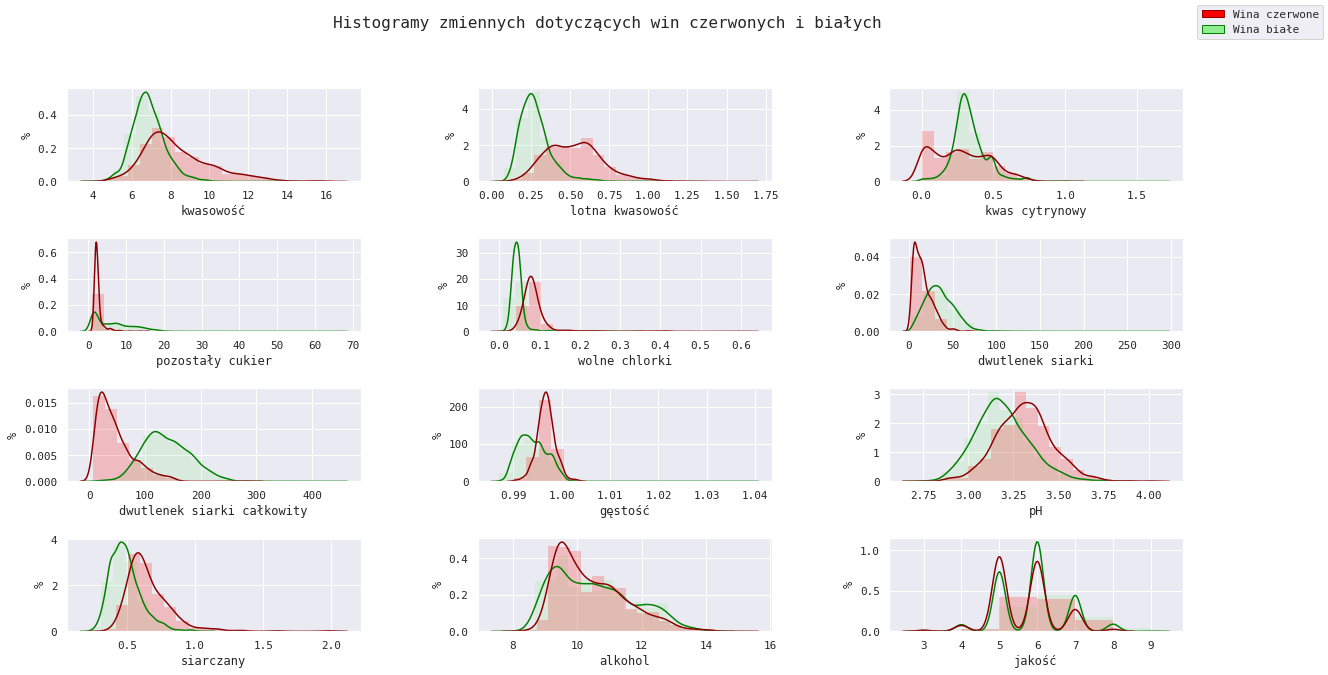

In [4]:
def hist(col, ax, binwidth=None):

    ax.set_ylabel('%')
    if (binwidth is None):
        binwidth = 1 if col == 'jakość' else (X[col].max() - X[col].min())/20

    for is_red, group in X.groupby('czerwone'):

        histplot(data=group, x=col, ax=ax, binwidth = binwidth, 
            color = 'red' if is_red else 'lightgreen',
            stat="density", edgecolor="none", alpha=0.2
        )

        kdeplot(data=group, x=col, ax=ax, color='darkred' if is_red else 'green')

def hists():

    fig, axs = subplots(4,3, figsize=(20, 10), sharey=False)
    axs = axs.ravel()

    for i, col in enumerate(K):
        hist(col, axs[i])

    fig.suptitle('Histogramy zmiennych dotyczących win czerwonych i białych', fontsize=16)
    fig.subplots_adjust(wspace=0.4, hspace=0.6)

    legend_elements = [Patch(facecolor='red', edgecolor='darkred',
                             label='Wina czerwone'),
                       Patch(facecolor='lightgreen', edgecolor='green',
                             label='Wina białe')]

    fig.legend(handles=legend_elements, loc='upper right')

hists()

## Normalność w 2 grupach kolorystycznych

Wykresy kwantyl-kwantyl wskazują, że normalności można oczekiwać po zmiennych takich jak **pH** oraz 
**gęstość**, ale tylko w przypadku win **czerownych**. Można też spekulować o normalności 
**całkowitego dwutlenku siarki** oraz również **pH** w przypadku win **białych**. 

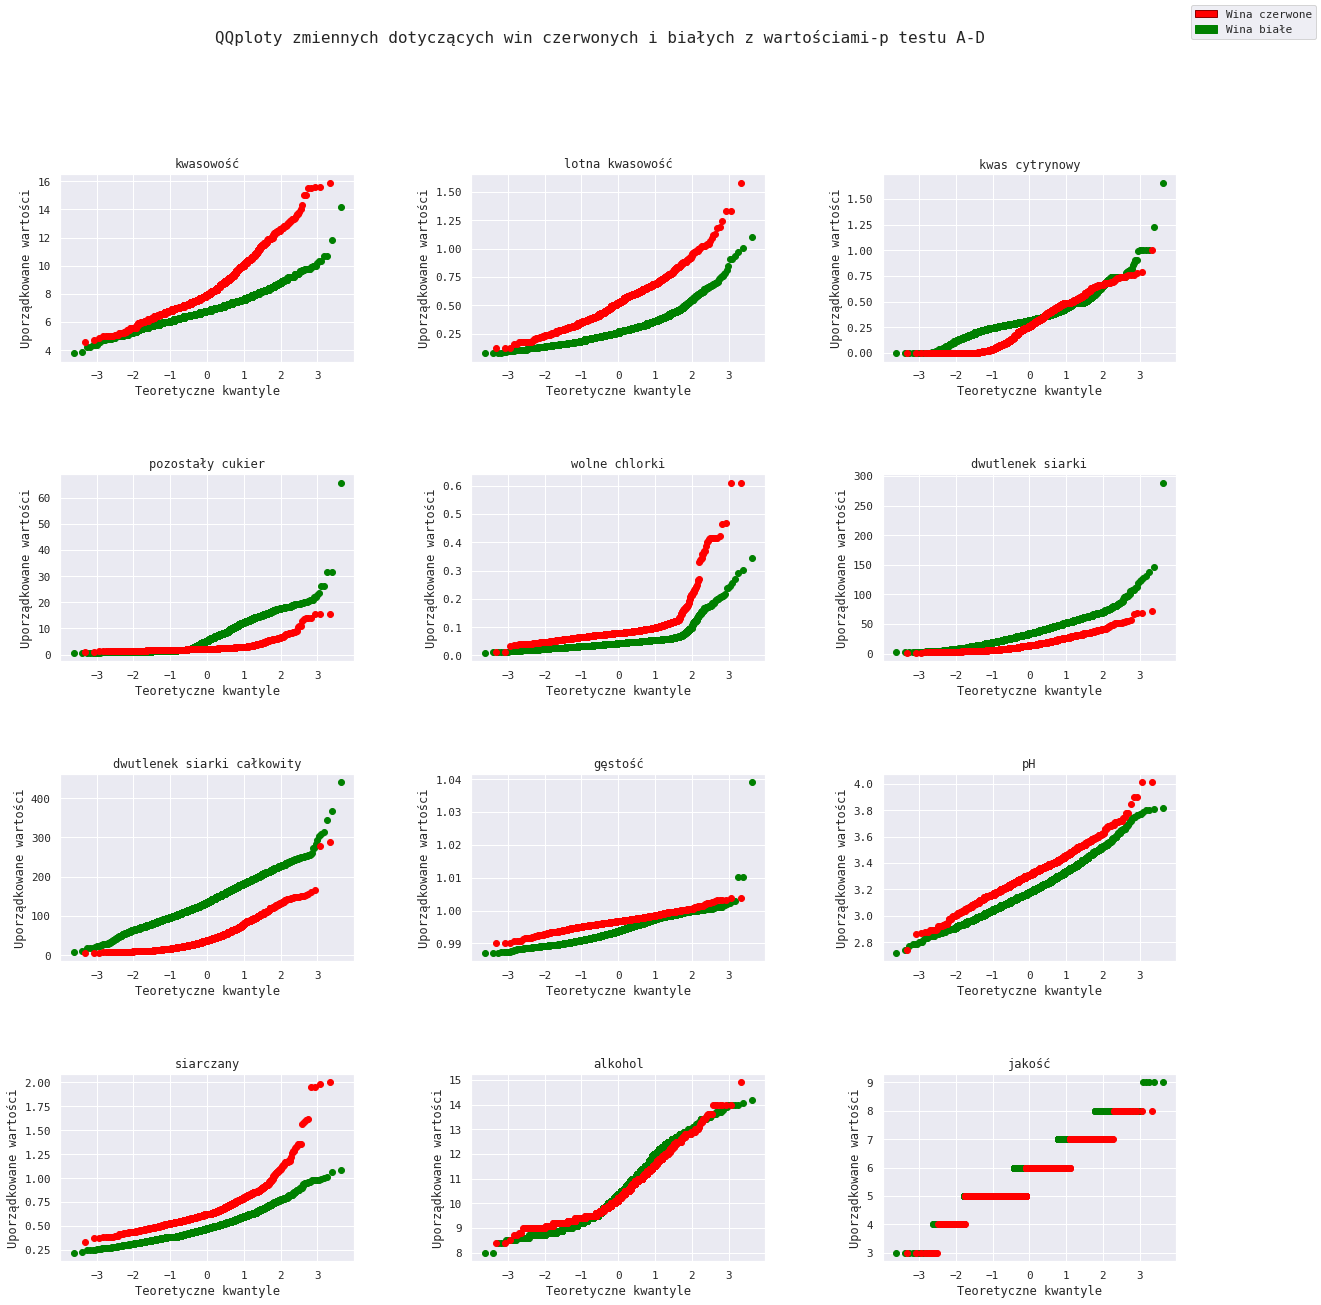

In [5]:
def qqplot(col, ax):

    for is_red, group in X.groupby('czerwone'):
        osm, osr = stats.probplot(group[col])
        ax.plot(osm[0], osm[1], 'o', color='red' if is_red else 'green')

    ax.set_title(col)
    ax.set_xlabel('Teoretyczne kwantyle')
    ax.set_ylabel('Uporządkowane wartości')

def qqplots():

    fig, axs = subplots(4,3, figsize=(20, 20), sharey=False)
    axs = axs.ravel()

    for i, col in enumerate(K):
        qqplot(col, axs[i])

    fig.suptitle('QQploty zmiennych dotyczących win czerwonych i białych z wartościami-p testu A-D', fontsize=16)
    fig.subplots_adjust(wspace=0.4, hspace=0.6)

    legend_elements = [Patch(facecolor='red', edgecolor='darkred',
                             label='Wina czerwone'),
                       Patch(facecolor='green', edgecolor='green',
                             label='Wina białe')]

    fig.legend(handles=legend_elements, loc='upper right')

qqplots()

## Wykresy pudełkowe ze względu na kolor

Wykresy pudełkowe zdają się być spójne ze wcześniejszymy przypuszczeniami co do różnic w wielkościach
zmiennych.

Widać też na nich, że jest bardzo dużo wartości odstających, czyli w tym przypadku takich, które nie
mieszczą się między pierwszym a trzecim kwartylem. Nie dotyczy to jednak gęstości, ph, stężenia alkoholu,
czy oceny jakości.

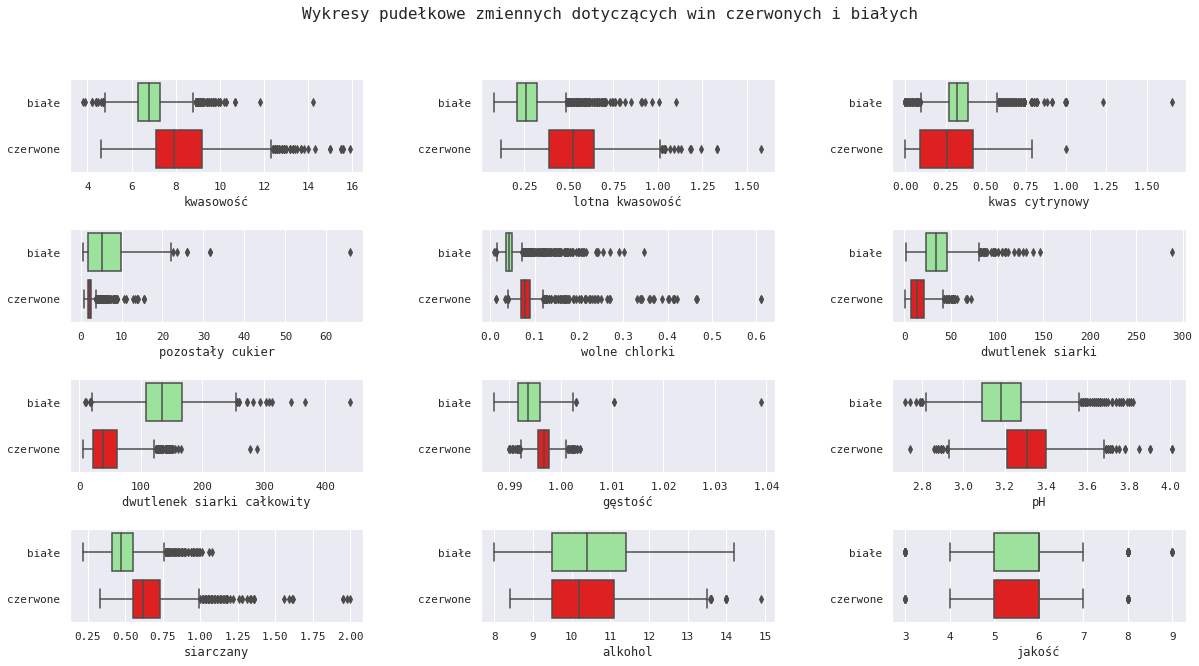

In [6]:
def box(col, ax):

    boxplot(data=X, x=col, y='czerwone', ax=ax, palette=['lightgreen', 'red'], orient = 'h')
    ax.set_ylabel('')
    ax.set_yticklabels(['białe', 'czerwone'])
    ax.set_xlabel(col)

def boxes():

    fig, axs = subplots(4, 3, figsize=(20, 10), sharey=False)
    axs = axs.ravel()

    for i, col in enumerate(K):
        box(col, axs[i])

    fig.suptitle('Wykresy pudełkowe zmiennych dotyczących win czerwonych i białych', fontsize=16)
    fig.subplots_adjust(wspace=0.4, hspace=0.6)

boxes()

### Wartości po za rozstępem międzykwartylowym

Dalsz analiza wartości odstajacych pokazuje, że udział wartości po za rozstępem międzykwartylowym
jest niewielki i nawet w najgorszym przypadku osiąga **mniej niż 10%**. Ogólnie wartości bywają 
**raczej większe** niż mniejsze od granic rozstępu.

In [7]:
outliers = {'ogólnie': [], '%': [], 'mniejsze niż Q1': [], 'większe od Q3': []}
def calc(col, red = False):

    X_group = X[X['czerwone'] == red]
    Q1 = X_group[col].quantile(0.25)
    Q3 = X_group[col].quantile(0.75)
    IQR = Q3 - Q1
    lesser = (X_group[col] < (Q1 - 1.5 * IQR)).sum()
    larger = (X_group[col] > (Q3 + 1.5 * IQR)).sum()
    outliers['mniejsze niż Q1'].append(lesser)
    outliers['większe od Q3'].append(larger)
    outliers['ogólnie'].append(larger + lesser)
    outliers['%'].append((lesser + larger) / X_group.shape[0] * 100)

for col in K:
    calc(col, True)
    calc(col, False)

K_red = []
for col in K:
    K_red.append('czerwone: ' + col)
    K_red.append('białe: ' + col)

DataFrame(outliers, index = K_red)

,ogólnie,%,mniejsze niż Q1,większe od Q3
czerwone: kwasowość,49,3.064415,0,49
białe: kwasowość,119,2.429563,14,105
czerwone: lotna kwasowość,19,1.188243,0,19
białe: lotna kwasowość,186,3.797468,0,186
czerwone: kwas cytrynowy,1,0.062539,0,1
białe: kwas cytrynowy,270,5.512454,85,185
czerwone: pozostały cukier,155,9.693558,0,155
białe: pozostały cukier,7,0.142915,0,7
czerwone: wolne chlorki,112,7.004378,9,103
białe: wolne chlorki,208,4.246631,7,201


## Korelacja

Analiza korelacji pokazuje istotne skorelowanie między zmiennymi, szczególnie **dwutlenek siarki**
z **całościową** jego zawartością, możliwe że konieczna jest redukcja tych zmiennych do jednej.
Widać też że korelacje tych zmiennych z innymi są niemal identyczne wartościowo.

Widać też fizyczną właściwość jaką jest fakt, że **alkohol** gęsty nie jest - co za tym idzie ma dużą
**ujemną korelację z gęstością**.

Sama **gęśtość** koreluje dodatnio w zauważalny sposób z zawartością **cukru** i **kwasowością** wina.

W ocenie **jakości** widać duży wpływ **stężenia alkoholu**, którego jednak nie widać przy stężeniu
siarki.

Wbrew powszechnej opinii, że jak wino ma **siarczany** to ma też dobrze trzepać i być tanie...
analiza korelacji pokazuje, że przeciwnie: kolelacja ze stężeniem alkoholu jest ujemna.

Największą korelację widać jednak w **barwie** trunku - zależność jest niemal z **każdą** zmienną,
**pomijając alkohol i jakość**.


### Brak korelacji

Należy też wspomnieć o zupełnie nieskorelowanych parach:

- zawartość alkoholu i kwasu cytrynowego
- gęstość i pH
- pH i jakość
- siarczany i alkohol

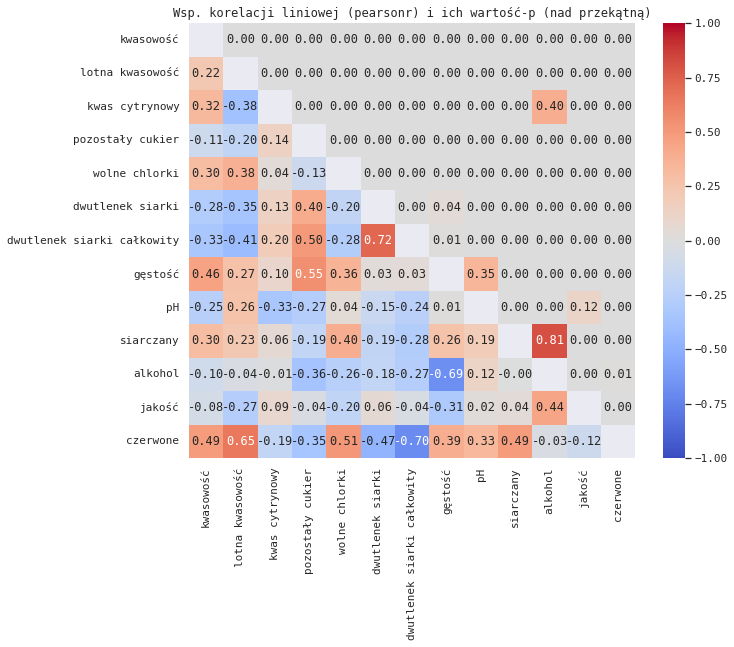

In [8]:
def cor_heatmap(X: DataFrame, f=pearsonr, **kwargs):
    
    p_values = DataFrame(index=X.columns, columns=X.columns)
    corrs = list()

    for i, column1 in enumerate(p_values.columns):
        for j, column2 in enumerate(p_values.columns):
            if i < j:
                cor, p_value = f(X[column1], X[column2])
                p_values.loc[column1, column2] = p_value
                p_values.loc[column2, column1] = cor
                corrs.append({ "x": column1, "y": column2, "Korelacja": cor, "Wartość-p": p_value })
            elif i == j:
                p_values.loc[column1, column2] = NaN

    annot = True
    if (len(X.columns) > 15):
        annot = False        

    figure(figsize=(10, 8), **kwargs)
    ax = heatmap(p_values.astype(float), annot=annot, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    ax.set_title(f"Wsp. korelacji liniowej ({f.__name__}) i ich wartość-p (nad przekątną)")

    return DataFrame(corrs)


cor_pearson = cor_heatmap(X)
cor_pearson.replace(skróty, inplace=True)

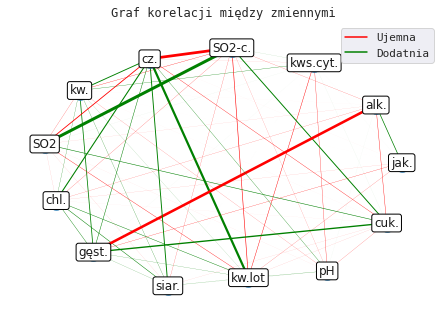

In [9]:
def cor_graph(cor_list, **kwargs):

    figure(**kwargs)
    G = Graph()

    for (x, y, cor, p_value) in cor_list.itertuples(index=False):
        G.add_edge(x, y, weight=cor, style='dashed' if p_value < 0.05 else 'solid')

    draw(G, with_labels = True, width=8*cor_list["Korelacja"]**3, pos=spring_layout(G, k=100, iterations=100), edge_color = ['green' if G[u][v]['weight'] >= 0 else 'red' for u, v in G.edges()], bbox=dict(
        facecolor="white", 
        edgecolor="black", 
        boxstyle="round,pad=0.2"
    ))

    red_line = mlines.Line2D([], [], color='red', markersize=15, label='Ujemna')
    green_line = mlines.Line2D([], [], color='green', markersize=15, label='Dodatnia')
    legend(handles=[red_line, green_line])
    title("Graf korelacji między zmiennymi")

cor_graph(cor_pearson);

In [10]:
DataFrame(skróty, index=['skrót']).T

,skrót
kwasowość,kw.
lotna kwasowość,kw.lot
kwas cytrynowy,kws.cyt.
pozostały cukier,cuk.
wolne chlorki,chl.
dwutlenek siarki,SO2
dwutlenek siarki całkowity,SO2-c.
gęstość,gęst.
siarczany,siar.
alkohol,alk.


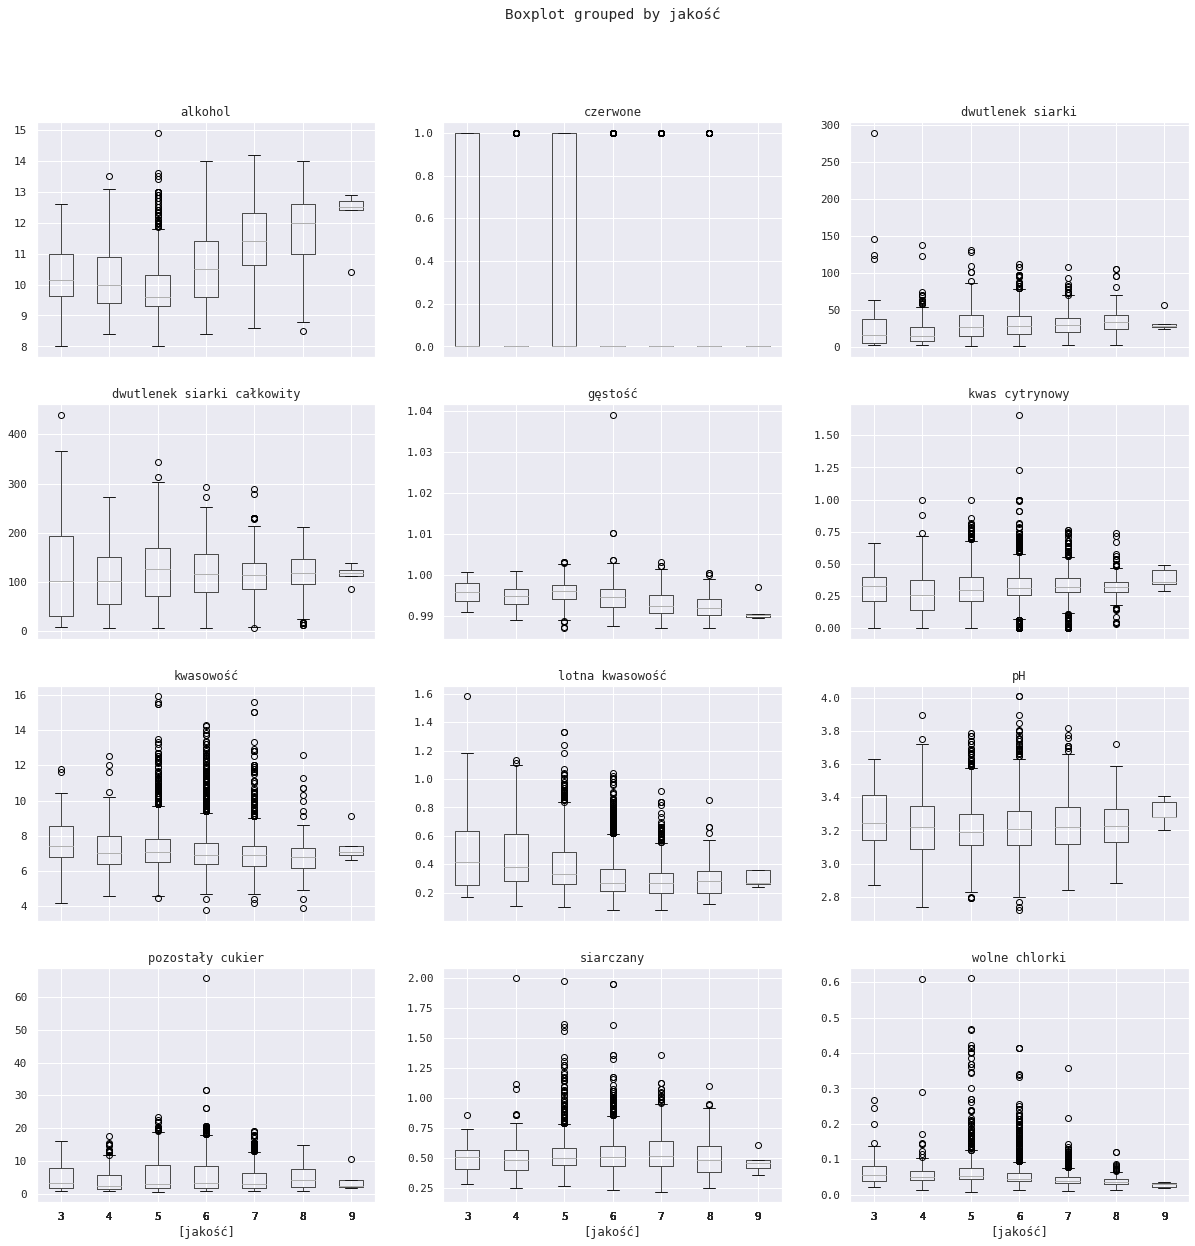

In [40]:
X.boxplot(by = 'jakość', figsize=(20, 20), sharey=False);

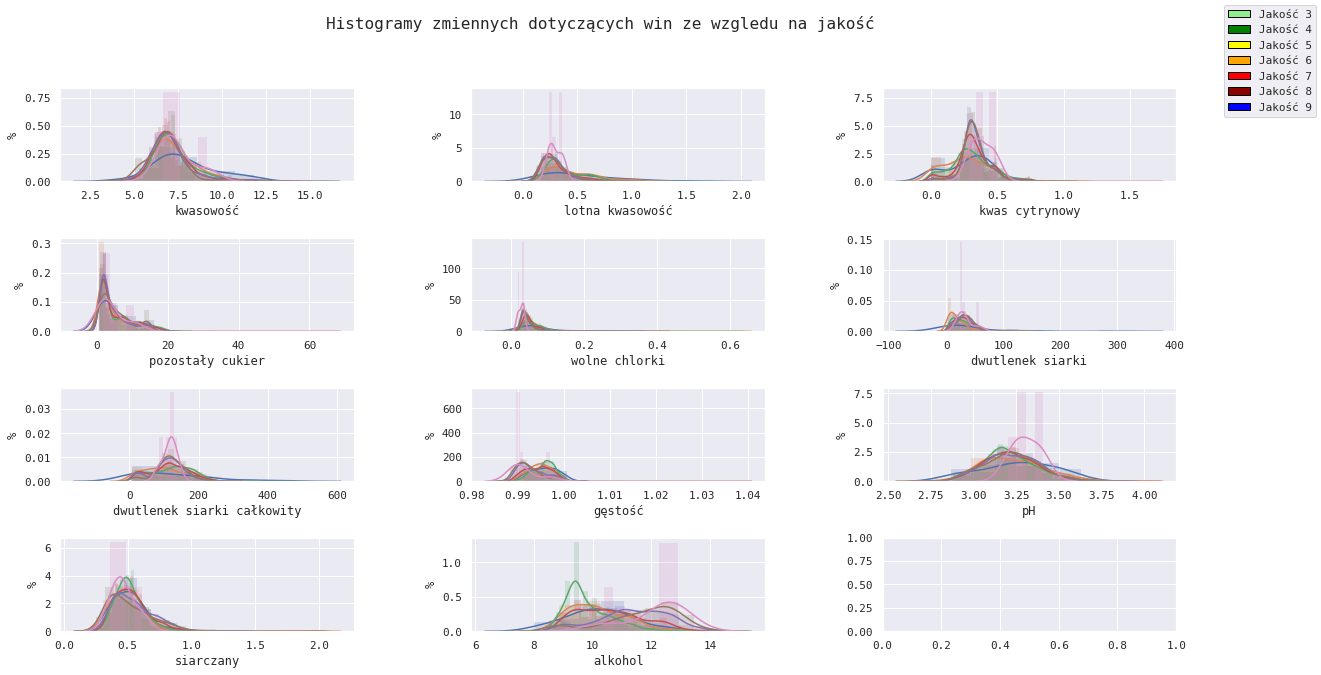

In [57]:
quality_colors = [
        'lightgreen',
        'green',
        'yellow',
        'orange',
        'red',
        'darkred',
        'blue'
    ]


def quality_hist(col, ax):

    ax.set_ylabel('%')
    for i, (quality, group) in enumerate(X.groupby('jakość')):
        
        histplot(data=group, x=col, ax=ax, stat="density", edgecolor="none", alpha=0.2, color=quality_colors[i])
        kdeplot(data=group, x=col, ax=ax, color=quality_colors[i])

def quality_hists():

    fig, axs = subplots(4,3, figsize=(20, 10), sharey=False)
    axs = axs.ravel()

    for i, col in enumerate(K):
        if col == 'jakość':
            continue

        quality_hist(col, axs[i])

    fig.suptitle('Histogramy zmiennych dotyczących win ze wzgledu na jakość', fontsize=16)
    fig.subplots_adjust(wspace=0.4, hspace=0.6)

    legend_elements = [Patch(facecolor=color, edgecolor='black', label=f'Jakość {i+3}') for i, color in enumerate(quality_colors)]
    fig.legend(handles=legend_elements, loc='upper right')

quality_hists()